# Aula 3: Scraping (Cont.)

Em nossa última aula aprendemos como realizar uma requisição para uma página, enviando parâmetros, afim de obter o seu código fonte e, assim, realizar alguma coleta de dados. Mais especificamente, aprendemos a realizar o método *POST* a partir do pacote *requests*

Hoje aprenderemos como realizar coleta de dados utilizando um [webdriver](https://www.seleniumhq.org/projects/webdriver/). Utilizaremos um webdriver sempre que for necessário abrir um navegador para a construção do código fonte da página. 

Esses casos são incomuns, mas em algumas páginas o JavaScript não rendeiriza o código fonte da página a não ser que seja acessado via navegador.

Vamos começar importando um importante pacote, o [os](https://docs.python.org/3/library/os.html). Este módulo permite executar vários comando do sistema openacional de dentro do python

In [1]:
import os

Podemos listar os arquivos do diretório atual

In [2]:
os.listdir()

['aula1.ipynb',
 'aula3.ipynb',
 '.DS_Store',
 'aula2.ipynb',
 'filmes_FRED.xls',
 'ufpe.py',
 '__pycache__',
 '.ipynb_checkpoints',
 '2.png',
 '3.png',
 '1.png']

In [3]:
os.getcwd()

'/Users/gustavorsampaio/Documents/Cursos/Python 2023.2'

In [4]:
pwd()

'/Users/gustavorsampaio/Documents/Cursos/Python 2023.2'

Ou alterar o diretório de trabalho.

In [5]:
os.chdir("/Users/gustavorsampaio/Documents/Cursos/Estatística 2020.1")

In [6]:
os.listdir()

['slides_2020',
 'Prova 2',
 '.DS_Store',
 'NOTAS ESTATÍSTICA 1.py',
 'Lista 1',
 'Notas 2',
 'Notas.xlsx',
 'Segunda Chamada',
 'Prova 1',
 'Lista 3',
 'Lista 2',
 'Notas_ori.xlsx',
 'Notas 1',
 'aulas']

In [7]:
os.chdir("/Users/gustavorsampaio/Documents/Cursos/Python 2023.2/")

In [8]:
os.getcwd()

'/Users/gustavorsampaio/Documents/Cursos/Python 2023.2'

In [9]:
pwd()

'/Users/gustavorsampaio/Documents/Cursos/Python 2023.2'

In [10]:
os.listdir()

['aula1.ipynb',
 'aula3.ipynb',
 '.DS_Store',
 'aula2.ipynb',
 'filmes_FRED.xls',
 'ufpe.py',
 '__pycache__',
 '.ipynb_checkpoints',
 '2.png',
 '3.png',
 '1.png']

Vamos, agora, importar o pacote webdriver. Observe que o webdriver é um sub-pacote do módulo selenium.

In [11]:
from selenium import webdriver
# conda install selenium
# conda install -c conda-forge selenium
# pip install selenium

from bs4 import BeautifulSoup
import requests
import time

Iniciaremos realizando uma requisição *GET* para a página do cinema Riomar

In [20]:
gusta = requests.get('https://www.ingresso.com/cinema/cinemark-riomar-recife')

In [21]:
alex = BeautifulSoup(gusta.text, 'lxml')

In [22]:
str(alex)[0:1000]

'<!DOCTYPE html>\n<html lang="pt-BR"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><title>Cinemark RioMar Recife - Ingresso.com</title><meta content="3" name="next-head-count"/><link href="https://api-content.ingresso.com/v0/" rel="preconnect"/><link href="https://ingresso-a.akamaihd.net/" rel="preconnect"/><link href="/manifest.json" rel="manifest"/><meta content="#000" name="theme-color"/><link href="https://ingresso-a.akamaihd.net/catalog/img/icons/android-icon-final-180x180.png" rel="apple-touch-icon"/><meta content="#FF7300" name="msapplication-TileColor"/><meta content="https://ingresso-a.akamaihd.net/catalog/img/icons/msapplication-TileImage-final.png" name="msapplication-TileImage"/><meta content="pgvbk5jlhutg0c6aul5kk1hdqf4wrn" name="facebook-domain-verification"/><script async="" src="https://www.googleoptimize.com/optimize.js?id=OPT-5BX7RVG"></script><script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({"gtm.start": new Dat

Tentaremos encontrar os preços de cada seção. Ná página há uma aba com os preços listados de cada uma delas.

In [15]:
texto = "Os alunos de economia são nota 10"

In [16]:
texto

'Os alunos de economia são nota 10'

In [17]:
"alunos" in texto

True

In [18]:
'Preços' in 'Os Preços estão caros'

True

In [23]:
'Oppenheimer' in str(alex)

False

In [24]:
'Preços' in str(alex)

False

Observe, porém, que não há nada relacionado a "Preços" no código fonte. Isto ocorre por que o JavaScript só carrega a informação quando clicamos na aba. Desta maneira, fica difícil extrair a informação a partir do código html.

Utilizaremos o webdriver para realizar tal coleta.
##### FireFox
``
driver = webdriver.Firefox()``
##### Chrome
``
driver = webdriver.Chrome()
driver = webdriver.Chrome(executable_path='')``

Vamos utilizar o Chrome

In [27]:
driver = webdriver.Chrome()

In [39]:
driver = webdriver.Chrome(executable_path='/Users/gustavorsampaio/chromedriver')

In [28]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="1927c19859fb6ef9340e06327d318f38")>

In [74]:
driver_haroldo = webdriver.Chrome()

In [36]:
driver_haroldo

<selenium.webdriver.chrome.webdriver.WebDriver (session="5ad0d51e469383925dee46608561c9d3")>

In [75]:
driver_haroldo.quit()

In [71]:
driver.quit()

Observe que alguns parâmetros podem ser passados para o webdriver se importarmos o sub-modulo Options a partir do webdriver

Podemos iniciar o navegador sem, necessariamente, vê-lo. Também podemos alterar o tamanho da página do navegador. Por fim, como cada navegador requer um conector, podemos definir o caminho para o executável.

In [29]:
from selenium.webdriver.chrome.options import Options

In [30]:
# Chrome Headless
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=2920x1080")

# Caminho para o executável
#chrome_driver = "/Users/gustavorsampaio/chromedriver"

In [77]:
#driver1 = webdriver.Chrome(options=chrome_options, executable_path=chrome_driver)
driver_isa = webdriver.Chrome(options=chrome_options)

In [78]:
driver_isa

<selenium.webdriver.chrome.webdriver.WebDriver (session="91b09de0f014ed508d1e01e0b5ccd596")>

In [79]:
driver_isa

<selenium.webdriver.chrome.webdriver.WebDriver (session="91b09de0f014ed508d1e01e0b5ccd596")>

In [80]:
driver_isa.quit()

In [81]:
driver = webdriver.Chrome()

In [82]:
driver.get("https://www.globo.com")

Podemos ajustar o tamanho do navegador

In [85]:
driver.set_window_size(1024, 850)

In [27]:
driver.get("https://www.globo.com")

In [31]:
cinema = 'https://www.ingresso.com/cinema/cinemark-riomar-recife'

In [32]:
driver.get(cinema)

'<html lang="pt-BR"><head><script id="CleverCoreLoader60514" src="https://scripts.cleverwebserver.com/b3186e432cd5089555dd5deac4613f48.js" async="" type="text/javascript" data-target="google_ads_iframe_/8804/ingresso.com/cinema_6" data-callback="https://adclick.g.doubleclick.net/pcs/click%253Fxai%253DAKAOjsvh3QHrTGTc8b7-pdA0qIyahBPQMYSit5SfVT0X1iOTeK8gc_LRlnmMX8hNE774Jrlswgn6vyWzzmV3b8lLDMtb9hcOkMbW-tSMrX_T-8bNHCrWqNDNrzt3JqQPZjLz6JsKBiU5mxh7fY4hKgCoM6xEuTknWVfrrWym_pa4HsebNydHbtTkB5Eda2srARzAJ5Yf34AuwweG0BhGYWndu4MLlSVJ5GtJfBdLBaxfJ-KnkRjwp3hqtcsX1CJipgnGqSY7ZWLS8sKT-OkffQjn0QQH9--_o1HsulQm3mz0LEYGs4TUTB4NzJOdm_OJvmJL0IqlwXBEIl6U%2526sai%253DAMfl-YSK0LwYzFJpC2fM0JX2HqJUTXSgKWv_Vn7mM5ENvgN6o-xKMqT1tTYQ6H8IUohX5O4ZbR9t-sX33-aruyGTMWi0DQrLy6S50QjEWiY8pr4ruO7zNP_JawaKuFXsNQ%2526sig%253DCg0ArKJSzCI7vFurDLEEEAE%2526fbs_aeid%253D%255Bgw_fbsaeid%255D%2526urlfix%253D1%2526adurl%253D" data-callback-url-click="put-your-click-macro-here" data-callback-url-view="put-your-view-macro-here"></script>
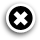

In [33]:
driver.page_source

In [34]:
html_source = driver.page_source

In [ ]:
html_source

In [35]:
'Preços' in html_source

True

In [37]:
"Oppenheimer" in html_source

True

In [39]:
soup = BeautifulSoup(html_source, 'lxml')

In [42]:
filmes = soup.find_all('h2', attrs={'class' : 'line-clamp-3 leading-normal lg:text-xl'})

In [43]:
filmes

[<h2 class="line-clamp-3 leading-normal lg:text-xl"><a class="text-white no-underline" href="https://www.ingresso.com/filme/oppenheimer?city=recife&amp;partnership=home">Oppenheimer</a></h2>,
 <h2 class="line-clamp-3 leading-normal lg:text-xl"><a class="text-white no-underline" href="https://www.ingresso.com/filme/besouro-azul?city=recife&amp;partnership=home">Besouro Azul</a></h2>,
 <h2 class="line-clamp-3 leading-normal lg:text-xl"><a class="text-white no-underline" href="https://www.ingresso.com/filme/gran-turismo-de-jogador-a-corredor?city=recife&amp;partnership=home">Gran Turismo – De Jogador a Corredor</a></h2>,
 <h2 class="line-clamp-3 leading-normal lg:text-xl"><a class="text-white no-underline" href="https://www.ingresso.com/filme/a-freira-2?city=recife&amp;partnership=home">A Freira 2</a></h2>,
 <h2 class="line-clamp-3 leading-normal lg:text-xl"><a class="text-white no-underline" href="https://www.ingresso.com/filme/as-tartarugas-ninja-caos-mutante?city=recife&amp;partnership

In [44]:
for filme in soup.find_all('h2', attrs={'class' : 'line-clamp-3 leading-normal lg:text-xl'}):
    print(filme.text)

Oppenheimer
Besouro Azul
Gran Turismo – De Jogador a Corredor
A Freira 2
As Tartarugas Ninja - Caos Mutante
Fale Comigo
MegaTubarão 2
O Porteiro
A Fada Do Dente


In [45]:
filmes = soup.find_all('a', attrs={'class' : 'text-white no-underline'})

In [46]:
filmes

[<a class="text-white no-underline" href="https://www.ingresso.com/minha-conta" rel="noreferrer" target="_self"><div class="flex items-center"><svg class="mr-3 h-6 w-6 cursor-pointer md:h-9 md:w-9 md:hover:opacity-80 fill-[#dde3f8]" viewbox="0 0 64 64" xmlns="http://www.w3.org/2000/svg"><path d="M32 6.667c13.991 0 25.333 11.342 25.333 25.333 0 13.991-11.342 25.333-25.333 25.333C18.009 57.333 6.667 45.991 6.667 32 6.667 18.009 18.009 6.667 32 6.667zm0 14.75c-4.631 0-5.948 2.607-5.058 8.026.04.24.034.486-.014.724-.362 1.768.122 3.687 1.238 5.742.32.588 1.623 2.583 1.75 3.008a2.001 2.001 0 0 1-1.298 2.476c-5.486 1.784-10.476 3.566-12.52 4.555 3.883 4.52 9.642 7.385 16.069 7.385 6.318 0 11.99-2.768 15.868-7.158l-12.26-4.819a2 2 0 0 1-.986-2.907c1.344-2.202 2.24-4.029 2.688-5.451.367-1.164.395-1.915.238-2.246a1.999 1.999 0 0 1-.19-.966c.373-6.9-.518-8.37-5.525-8.37zM32.167 11C20.477 11 11 20.477 11 32.167c0 3.817 1.01 7.398 2.778 10.49 2.005-1.05 6.496-2.693 11.192-4.272-.107-.184-.212-.37-

In [47]:
for filme in filmes:
    print(filme.text)


Oppenheimer
Besouro Azul
Gran Turismo – De Jogador a Corredor
A Freira 2
As Tartarugas Ninja - Caos Mutante
Fale Comigo
MegaTubarão 2
O Porteiro
A Fada Do Dente


In [52]:
filmes = soup.find_all('img', attrs={'class' : 'w-full'})

In [53]:
filmes

[<img alt="Imagem do filme Oppenheimer" class="w-full" data-nimg="fill" decoding="async" loading="lazy" src="https://ingresso-a.akamaihd.net/prd/img/movie/oppenheimer/fed7c21c-3ff4-49f3-95c6-5ce58c1e1432.webp?impolicy=nsm-poster" style="position: absolute; height: 100%; width: 100%; inset: 0px; color: transparent;"/>,
 <img alt="Imagem do filme Besouro Azul" class="w-full" data-nimg="fill" decoding="async" loading="lazy" src="https://ingresso-a.akamaihd.net/prd/img/movie/besouro-azul/a22e2ab8-a8bf-4ca6-8277-5c09a007984a.webp?impolicy=nsm-poster" style="position: absolute; height: 100%; width: 100%; inset: 0px; color: transparent;"/>,
 <img alt="Imagem do filme Gran Turismo – De Jogador a Corredor" class="w-full" data-nimg="fill" decoding="async" loading="lazy" src="https://ingresso-a.akamaihd.net/prd/img/movie/gran-turismo-de-jogador-a-corredor/b2e0220b-ae1a-447f-85a0-f26acb8e92b9.webp?impolicy=nsm-poster" style="position: absolute; height: 100%; width: 100%; inset: 0px; color: transpa

In [54]:
filmes[0]['alt']

'Imagem do filme Oppenheimer'

In [55]:
for filme in filmes:
    print(filme['alt'])

Imagem do filme Oppenheimer
Imagem do filme Besouro Azul
Imagem do filme Gran Turismo – De Jogador a Corredor
Imagem do filme A Freira 2
Imagem do filme As Tartarugas Ninja - Caos Mutante
Imagem do filme Fale Comigo
Imagem do filme MegaTubarão 2
Imagem do filme O Porteiro
Imagem do filme A Fada Do Dente
Imagem do mapa do google contendo a localização do cinema
Imagem Participo do consumidor.gov.br
10 vezes vencedora do Prêmio Reclame Aqui
O melhor de São Paulo Cinema - Guia Folha 2023 - Melhor APP de Ingresso


In [56]:
"O mar é lindo".replace("o", "a")

'O mar é linda'

In [57]:
lista_joao = "O mar é lindo".split(" ")

In [58]:
lista_joao

['O', 'mar', 'é', 'lindo']

In [59]:
p = lista_joao[0]
u = lista_joao[-1]

In [60]:
p,u

('O', 'lindo')

Vamos realizar uma coleta em loop e colocar uma espera entre cada coleta

In [63]:
'https://www.ingresso.com/cinema/uci-recife'.split('/')[-1]

'uci-recife'

In [118]:
print("oi")
print("FUI")

oi
FUI


In [119]:
print("oi")
time.sleep(4)
print("FUI")

oi
FUI


In [68]:
cinemas = ['https://www.ingresso.com/cinema/uci-kinoplex-shopping-recife', 
           'https://www.ingresso.com/cinema/cinemark-riomar-recife']

for cinema in cinemas:
    print("Cinema: ",cinema.split('/')[-1])
    driver.get(cinema)
    time.sleep(5)
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'lxml')
    filmes = soup.find_all('h2', attrs={'class' : 'line-clamp-3 leading-normal lg:text-xl'})
    for filme in filmes:
        print("\t"+filme.text)

Cinema:  uci-kinoplex-shopping-recife
	Besouro Azul
	Gran Turismo – De Jogador a Corredor
	A Freira 2
	As Tartarugas Ninja - Caos Mutante
	Fale Comigo
	MegaTubarão 2
	TOC TOC TOC - Ecos do Além 
	Retratos Fantasmas
	O Porteiro
	A Fada Do Dente
Cinema:  cinemark-riomar-recife
	Oppenheimer
	Besouro Azul
	Gran Turismo – De Jogador a Corredor
	A Freira 2
	As Tartarugas Ninja - Caos Mutante
	Fale Comigo
	MegaTubarão 2
	O Porteiro
	A Fada Do Dente


Podemos abrir abas dentro do site. Possuimos a habilidade de clicar como se estivessemos utilizando um mouse

Há diversas maneiras de se fazer isto. Uma delas e utilizando a opção *xpath*. O *xpath* é o caminho completo de todos os *tags* até o elemento de interesse.

In [69]:
from selenium.webdriver.common.by import By

In [ ]:
/html/body/div[1]/div[1]/div/section/div[3]/div/div[1]/section[1]/div[1]/section/header/div/div[2]/div/div/svg/path

In [72]:
driver.find_elements(By.XPATH, "/html/body/div[1]/div[1]/div/section/div[3]/div/div[1]/section[1]/div[1]/section/header/div/div[2]/div/div")

[<selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06327d318f38", element="DCE3301A7E0BA5C97B8CBEFF13BC51BF_element_861")>]

In [73]:
driver.find_elements(By.XPATH, "/html/body/div[1]/div[1]/div/section/div[3]/div/div[1]/section[1]/div[1]/section/header/div/div[2]/div/div")[0]

<selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06327d318f38", element="DCE3301A7E0BA5C97B8CBEFF13BC51BF_element_861")>

In [74]:
driver.find_elements(By.XPATH, "/html/body/div[1]/div[1]/div/section/div[3]/div/div[1]/section[1]/div[1]/section/header/div/div[2]/div/div")[0].click()

Passando o *xpath* para o driver, observe que ele retorna uma lista com os objetos encontrados.

Uma vez que possuimos algum objeto, podemos clicar neste objeto em questão

In [75]:
driver.find_elements(By.XPATH, "/html/body/div[1]/div[1]/div/section/div[3]/div/div[1]/section[1]/div[1]/section/header/div/div[2]/div/div")

[<selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06327d318f38", element="DCE3301A7E0BA5C97B8CBEFF13BC51BF_element_861")>]

In [76]:
html_source_1 = driver.page_source

Uma outra forma de encontrar elementos no código fonte. Podemos procurar algum texto. Se encontrado, o tag que envolve aquele texto ficará clicavel.

In [77]:
driver.get(cinema)

In [121]:
cinema

'https://www.ingresso.com/recife/home/cinemas/cinemark-riomar-recife'

In [84]:
driver.find_elements(By.XPATH, "//*[contains(text(), 'Preços')]")

[<selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06327d318f38", element="00A6845604B8B2D41CEEBD954E83E2BA_element_916")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06327d318f38", element="00A6845604B8B2D41CEEBD954E83E2BA_element_917")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06327d318f38", element="00A6845604B8B2D41CEEBD954E83E2BA_element_918")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06327d318f38", element="00A6845604B8B2D41CEEBD954E83E2BA_element_919")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06327d318f38", element="00A6845604B8B2D41CEEBD954E83E2BA_element_920")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06327d318f38", element="00A6845604B8B2D41CEEBD954E83E2BA_element_921")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06

In [85]:
driver.find_elements(By.XPATH, "//*[contains(text(), 'Preços')]")[4]

<selenium.webdriver.remote.webelement.WebElement (session="1927c19859fb6ef9340e06327d318f38", element="00A6845604B8B2D41CEEBD954E83E2BA_element_920")>

In [87]:
driver.find_elements(By.XPATH, "//*[contains(text(), 'Preços')]")[4].click()

Podemos buscar parte de um código html dentro da página. Estamos procurando algo por sua *tag*

In [89]:
html = driver.page_source
bs_html = BeautifulSoup(html, 'lxml')

In [90]:
bs_html

<html lang="pt-BR"><head><script async="" id="ttcustomaudienceTT-10162-1" src="https://TT-10162-1.seg.t.tailtarget.com/ca?tZ=274906538&amp;env=_ttq_tt_uol" type="text/javascript"></script><script async="" id="ttprofileTT-10162-1" src="https://b.t.tailtarget.com/b?tA=TT-10162-1&amp;tY=1&amp;tS=2&amp;tU=0100007FA61DFF649506F77102098105&amp;tX=b.52&amp;tZ=301904484&amp;tO=1&amp;env=_ttq_tt_uol" type="text/javascript"></script><script async="" src="https://tm.jsuol.com.br/modules/external/tailtarget/libs/base.js" type="text/javascript"></script><script async="true" src="https://sb.scorecardresearch.com/c2/22020165/cs.js" type="text/javascript"></script><script async="" src="https://tm.jsuol.com.br/modules/external/tailtarget/libs/conversion.js" type="text/javascript"></script><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><title>Cinemark RioMar Recife - Ingresso.com</title><link as="image" fetchpriority="high" href="https://ingresso-a.akamaihd.n

In [93]:
bs_html.find_all('div',attrs={'role':'tabpanel'})

[<div aria-labelledby="tab:R1pjbm:0" class="py-[10px] pb-[55px] text-white lg:py-0 react-tabs__tab-panel--selected" id="panel:R1pjbm:0" role="tabpanel"><div class="transition-opacity ease-in-out lg:static fixed left-0 right-0 top-[50px] z-20 block w-full opacity-90"><div class="bg-[#252525] py-2 pl-[10px] lg:rounded lg:px-0"><div aria-roledescription="carousel" class="splide relative [&amp;.is-overflow:hover_.swiper-arrows]:opacity-100 [&amp;.is-overflow:has(button.swiper-arrow-left:not(:disabled))]:before:left-0 [&amp;.is-overflow:has(button.swiper-arrow-right:not(:disabled))]:after:right-0 [&amp;_.swiper-arrow-left]:left-0 [&amp;_.swiper-arrow-right]:right-0 splide--slide splide--ltr splide--draggable is-active is-overflow is-initialized" id="splide02" role="region"><div class="splide__arrows swiper-arrows opacity-0 splide__arrows--ltr"><button aria-controls="splide02-track" aria-label="Previous slide" class="swiper-arrow swiper-arrow-left splide__arrow--prev top-[calc(50%_-_12px)] c

In [94]:
bs_html.find_all('span',attrs={'class':'sc-ihgnxF fovTRt'})

[<span class="sc-ihgnxF fovTRt"><span class="sc-fxwrCY bRINrV iconFormat" color="#fff" height="100" width="100"><div><div><svg class="injected-svg" data-src="https://ingresso-a.akamaihd.net/sitenovo-2017/checkout/seats/formats/circle.svg" role="img" viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
 <circle class="i-background" cx="12" cy="12" r="12"></circle>
 <path class="i-border" d="M12 0c6.6 0 12 5.4 12 12s-5.4 12-12 12S0 18.6 0 12 5.4 0 12 0zm.1 2.1c-5.5 0-10 4.5-10 10s4.5 10 10 10 10-4.5 10-10c0-5.6-4.5-10-10-10z"></path>
 </svg></div></div></span><svg class="sc-bBeLUv itxppj" height="100%" viewbox="0 0 300 24" width="100%"></svg></span>,
 <span class="sc-ihgnxF fovTRt"><span class="sc-fxwrCY bRINrV iconFormat" color="#fff" height="100" width="100"><div><div><svg class="injected-svg" data-src="https://ingresso-a.akamaihd.net/sitenovo-2017/checkout/seats/formats/circle.svg" role="img" viewbox="0 0 24 24" xmlns="http://www.w3.org/20

In [97]:
room = bs_html.find_all('div',attrs={'class':'sc-iMTnTL cOMHiZ'})

In [98]:
room

[<div class="sc-iMTnTL cOMHiZ"><div class="sc-krNlru elseMR" height="0"><span class="sc-jaXxmE kVEUoO" width="0">J</span><span class="sc-ihgnxF fovTRt"><span class="sc-fxwrCY bRINrV iconFormat" color="#fff" height="100" width="100"><div><div><svg class="injected-svg" data-src="https://ingresso-a.akamaihd.net/sitenovo-2017/checkout/seats/formats/circle.svg" role="img" viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
 <circle class="i-background" cx="12" cy="12" r="12"></circle>
 <path class="i-border" d="M12 0c6.6 0 12 5.4 12 12s-5.4 12-12 12S0 18.6 0 12 5.4 0 12 0zm.1 2.1c-5.5 0-10 4.5-10 10s4.5 10 10 10 10-4.5 10-10c0-5.6-4.5-10-10-10z"></path>
 </svg></div></div></span><svg class="sc-bBeLUv itxppj" height="100%" viewbox="0 0 300 24" width="100%"></svg></span><span class="sc-ihgnxF fovTRt"><span class="sc-fxwrCY bRINrV iconFormat" color="#fff" height="100" width="100"><div><div><svg class="injected-svg" data-src="https://ingresso-a.aka

In [96]:
len(room)

1

In [105]:
seats = room[0].find_all('svg',attrs={'class':"sc-bBeLUv itxppj"})

In [106]:
len(seats)

189

In [107]:
seats_av = room[0].find_all('span',attrs={'class':"sc-ihgnxF fovTRt"})

In [109]:
len(seats_av)

129

In [110]:
seats_oc = room[0].find_all('span',attrs={'class':"sc-ihgnxF dpWAHZ"})

In [111]:
len(seats_oc)

1

Já que podemos clicar e navegar pelas páginas utilizando o webdriver, podemos utiliza-lo para realizar login em uma página

In [117]:
driver.get('https://www.ingresso.com/minha-conta/login')

In [143]:
driver.find_element(By.NAME, "username").send_keys('classe_de_python@ufpe.com')

In [144]:
driver.find_element(By.NAME, "password").send_keys('senha_de_python')

In [145]:
driver.find_elements(By.XPATH, "//*[contains(text(), 'Entrar')]")[3].click()

Vamos realizar uma pesquisa no Google

In [153]:
driver.quit()

In [146]:
driver.get('https://www.google.com')

In [147]:
search = driver.find_element(By.NAME, 'q')

In [148]:
search

<selenium.webdriver.remote.webelement.WebElement (session="988956960e3594c411ea6381fc78bcfb", element="1975A4A2BFBE1199CB5593913639AD7C_element_2")>

In [149]:
search.send_keys("Dua Lipa")

Podemos importar o sub-pacote *Keys* para imitar o clique de um ENTER

In [150]:
from selenium.webdriver.common.keys import Keys

In [151]:
search.send_keys(Keys.RETURN)

'<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="pt-BR"><head><meta charset="UTF-8"><meta content="dark" name="color-scheme"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Dua Lipa - Pesquisa Google</title><script type="text/javascript" id="www-widgetapi-script" src="https://www.youtube.com/s/player/7ee36b0e/www-widgetapi.vflset/www-widgetapi.js" async="" nonce=""></script><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.vIVemAYlBvo.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo_eZqauDOH0vAaumGJQwp71CTPx9g/cb=gapi.loaded_0" nonce="" async=""></script><script nonce="">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'Jzr_ZKHDDbLM1sQP27GvwAc\',kEXPI:\'31\',kBL:\'p7Qf\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?
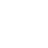
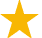
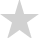
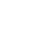
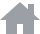
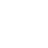
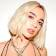
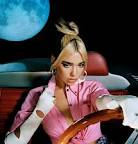
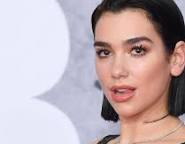
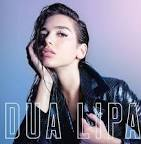
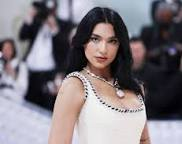
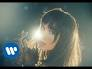
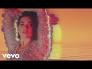
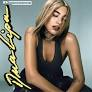
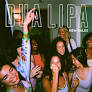
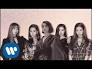
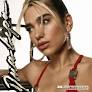
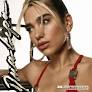
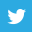
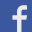
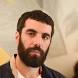
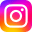
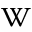
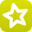
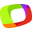
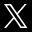
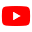
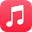
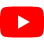
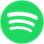
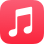
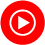
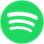
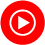
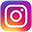
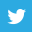
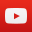
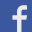
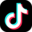
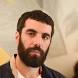
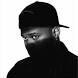
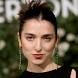
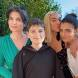
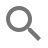
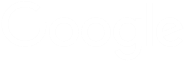

In [152]:
driver.page_source

In [158]:
driver.save_screenshot("DUA.png")

True

### Definição de Funções

Aprenderemos agora a definir funções em Python. As funções irão nos permitir definir objetos de forma a tornar nossas coletas de dados ou qualquer outro trabalho, mais simples.

Uma função é composta por um grupo de declarações que realizam uma tarefa específica

Ela deve começar com a palavra chave *def*:

``
def function_name(parameters):

    """docstring"""
    
    statement(s)
``

In [4]:
def soma():
    y = 2+2
    print(y)

In [5]:
soma

<function __main__.soma()>

In [6]:
soma()

4


In [9]:
soma()

4


In [15]:
def soma(q):
    """Essa é uma função para somar argumentos"""
    y = q+q
    print(y)

In [14]:
soma(7)

14


In [178]:
def calc_atual_divida(valor,taxa):
    atua = valor*taxa
    print(atua)

In [180]:
calc_atual_divida(1000000,1.0456)

1045600.0000000001


In [16]:
help(soma)

Help on function soma in module __main__:

soma(q)
    Essa é uma função para somar argumentos



In [75]:
soma(3)

6


In [19]:
def quadrado(q):
    """Essa é uma função para calcular ..."""
    y = q*q
    print(y)

In [184]:
quadrado(3023287364782365476237356748632)

9140266490052699813288581584206605799402912283785154433871424


In [22]:
j = quadrado(2)

4


In [24]:
j

In [25]:
def quadrado(q):
    y = q*q
    return (y)

In [26]:
resultado = quadrado(2)

In [27]:
resultado

4

In [28]:
soma(resultado)

8


Podemos, então, chamar a função e ela realizará todo o conjunto de declarações nela contida

In [64]:
soma()

4


As funções podem receber argumentos. Desta forma podem realizar tarefas condicinal às instruções passadar em cada chamada.

Observe, também, que trocamos o *print* do final por *return*

In [42]:
def vigorator(vig):
    mult = vig*vig
    summ = vig+vig
    sm = [mult,summ]
    return sm

In [43]:
vigorator(3)

[9, 6]

In [44]:
ms = vigorator(4)

In [47]:
ms[1]

8

In [32]:
s

8

In [48]:
m

16

In [49]:
def vigorator(vig):
    mult = vig*vig
    summ = vig+vig
    return (mult,summ)

In [156]:
driver = webdriver.Chrome()

In [36]:
cinemas = ['https://www.ingresso.com/cinema/uci-kinoplex-shopping-recife', 
           'https://www.ingresso.com/cinema/cinemark-riomar-recife']

for cinema in cinemas:
    print("Cinema: ",cinema.split('/')[-1])
    driver.get(cinema)
    time.sleep(5)
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'lxml')
    filmes = soup.find_all('h2', attrs={'class' : 'line-clamp-3 leading-normal lg:text-xl'})
    for filme in filmes:
        print("\t"+filme.text)

Cinema:  uci-kinoplex-shopping-recife
	Uma pitada de sorte
	Minions 2: A Origem de Gru
	Não! Não Olhe!
	A Liga dos Superpets 
	Ingresso Para o Paraíso
	Órfã 2: A Origem
	Homem-Aranha: Sem Volta para Casa – Versão Estendida
Cinema:  cinemark-riomar-recife
	Uma pitada de sorte
	Top Gun: Maverick
	Minions 2: A Origem de Gru
	Não! Não Olhe!
	A Liga dos Superpets 
	O Lendário Cão Guerreiro
	Elvis
	Ingresso Para o Paraíso
	Órfã 2: A Origem
	Homem-Aranha: Sem Volta para Casa – Versão Estendida
	A Última Chamada


In [154]:
def cine(url):
    print("Cinema: ",url.split('/')[-1])
    driver.get(url)
    time.sleep(5)
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'lxml')
    filmes = soup.find_all('h2', attrs={'class' : 'line-clamp-3 leading-normal lg:text-xl'})
    for filme in filmes:
        print("\t"+filme.text)

In [157]:
cine('https://www.ingresso.com/cinema/uci-kinoplex-shopping-recife')

Cinema:  uci-kinoplex-shopping-recife
	Besouro Azul
	Gran Turismo – De Jogador a Corredor
	A Freira 2
	As Tartarugas Ninja - Caos Mutante
	Fale Comigo
	MegaTubarão 2
	TOC TOC TOC - Ecos do Além 
	Retratos Fantasmas
	O Porteiro
	A Fada Do Dente


In [158]:
def felipe(arg1=10,arg2=10):
    g = arg1*arg2
    return g

In [159]:
felipe(arg2=30)

300

In [198]:
driver = webdriver.Chrome()

In [96]:
cinemas = ['https://www.ingresso.com/cinema/uci-kinoplex-shopping-recife', 
           'https://www.ingresso.com/cinema/cinemark-riomar-recife']

for cinema in cinemas:
    cine(cinema)

Cinema:  uci-recife
	Babenco - Alguém tem que ouvir o coração e dizer: parou
	Scooby! - O Filme
	Trolls 2
	Tenet
	O 3° Andar - Terror na Rua Malasaña
	Enquanto Estivermos Juntos
	Destruição Final – O Último Refúgio
	Invasão Zumbi 2: Península
	Convenção das Bruxas
Cinema:  cinemark-riomar-recife
	Trolls 2
	Enquanto Estivermos Juntos
	Destruição Final – O Último Refúgio
	Invasão Zumbi 2: Península
	Convenção das Bruxas
	Apagar o histórico


### Conduções if, elif e else

Em diversas situações precisamos que sequências de comando sejam executadas condicionalmente. Esta tarefa é realizada usando uma das difersas formas da estrutura if-else-while. A estrutura if-else-while mais simples tem o seguinte formato:


``if expressão:

    comandos
``    
Neste caso os comandos depois da intrução if são executados apenas se todos os elementos na expressão forem verdadeiros. Exemplo:

In [59]:
peras = 4
custo = peras*0.50 

if (peras >= 5): #desconto de 20% para compras grandes
    custo = 0.8*custo

In [60]:
custo

2.0

In [62]:
peras

4

In [63]:
peras <= 5

True

No caso em que existem duas alternativas, a estrutura if-else-while toma o seguinte formato:

``if expressão:

    comandos executados se a expressão for verdadeira
    
 else:
 
    comandos executados se a expressão for falsa
``

Neste caso, o primeiro grupo de comandos é executados somente se a expressão for verdadeira e o segundo grupo é executado somente se a expressão for falsa. Exemplo:

In [65]:
peras = 8
 
if (peras >= 5): #desconto de 20% para compras grandes
    custo = 0.8*(peras*0.50)
else:
    custo = peras*0.50

print(custo)

3.2


In [66]:
for i in range(0,100):
    if i <=60:
        print(i," é número menor ou igual que 60")
    else:
        print(i, "é número maior que 60")

0  é número menor ou igual que 60
1  é número menor ou igual que 60
2  é número menor ou igual que 60
3  é número menor ou igual que 60
4  é número menor ou igual que 60
5  é número menor ou igual que 60
6  é número menor ou igual que 60
7  é número menor ou igual que 60
8  é número menor ou igual que 60
9  é número menor ou igual que 60
10  é número menor ou igual que 60
11  é número menor ou igual que 60
12  é número menor ou igual que 60
13  é número menor ou igual que 60
14  é número menor ou igual que 60
15  é número menor ou igual que 60
16  é número menor ou igual que 60
17  é número menor ou igual que 60
18  é número menor ou igual que 60
19  é número menor ou igual que 60
20  é número menor ou igual que 60
21  é número menor ou igual que 60
22  é número menor ou igual que 60
23  é número menor ou igual que 60
24  é número menor ou igual que 60
25  é número menor ou igual que 60
26  é número menor ou igual que 60
27  é número menor ou igual que 60
28  é número menor ou igual qu

E quando existem três ou mais alternativas, o formato da estrtura if-else-while passa a ser:

``if expressão1:

    comandos executados se a expressão1 for verdadeira
    
 elif expressão2:
 
    comandos executados se a expressão2 for verdadeira
    
 elif expressão3:
 
    comandos executados se a expressão3 for verdadeira
    
    .
    .
    .
    
 else:
 
    comandos executados se nenhuma das expressões for verdadeira
``

Nestes casos, somente os comandos associados a primeira expressão verdadeira são executados; as expressões seguintes não são testadas e o resto da estrtura if-else-while é ignorada. Exemplo:

In [67]:
for i in range(0,100):
    if i < 60:
        print(i," é número menor que 60")
    elif i == 60:
        print(i," é número igual a 60")
    else:
        print(i, "é número maior que 60")

0  é número menor que 60
1  é número menor que 60
2  é número menor que 60
3  é número menor que 60
4  é número menor que 60
5  é número menor que 60
6  é número menor que 60
7  é número menor que 60
8  é número menor que 60
9  é número menor que 60
10  é número menor que 60
11  é número menor que 60
12  é número menor que 60
13  é número menor que 60
14  é número menor que 60
15  é número menor que 60
16  é número menor que 60
17  é número menor que 60
18  é número menor que 60
19  é número menor que 60
20  é número menor que 60
21  é número menor que 60
22  é número menor que 60
23  é número menor que 60
24  é número menor que 60
25  é número menor que 60
26  é número menor que 60
27  é número menor que 60
28  é número menor que 60
29  é número menor que 60
30  é número menor que 60
31  é número menor que 60
32  é número menor que 60
33  é número menor que 60
34  é número menor que 60
35  é número menor que 60
36  é número menor que 60
37  é número menor que 60
38  é número menor que

In [17]:
for i in range(0,100):
    if i < 60:
        print(i," é número menor que 60")
    elif i == 60:
        print(i," é número igual a 60")

0  é número menor que 60
1  é número menor que 60
2  é número menor que 60
3  é número menor que 60
4  é número menor que 60
5  é número menor que 60
6  é número menor que 60
7  é número menor que 60
8  é número menor que 60
9  é número menor que 60
10  é número menor que 60
11  é número menor que 60
12  é número menor que 60
13  é número menor que 60
14  é número menor que 60
15  é número menor que 60
16  é número menor que 60
17  é número menor que 60
18  é número menor que 60
19  é número menor que 60
20  é número menor que 60
21  é número menor que 60
22  é número menor que 60
23  é número menor que 60
24  é número menor que 60
25  é número menor que 60
26  é número menor que 60
27  é número menor que 60
28  é número menor que 60
29  é número menor que 60
30  é número menor que 60
31  é número menor que 60
32  é número menor que 60
33  é número menor que 60
34  é número menor que 60
35  é número menor que 60
36  é número menor que 60
37  é número menor que 60
38  é número menor que

In [20]:
for i in range(0,100):
    if i < 60:
        print(i," é número menor que 60")
    elif i < 50:
        print(i," é número menor ou igual a 70")

0  é número menor que 60
1  é número menor que 60
2  é número menor que 60
3  é número menor que 60
4  é número menor que 60
5  é número menor que 60
6  é número menor que 60
7  é número menor que 60
8  é número menor que 60
9  é número menor que 60
10  é número menor que 60
11  é número menor que 60
12  é número menor que 60
13  é número menor que 60
14  é número menor que 60
15  é número menor que 60
16  é número menor que 60
17  é número menor que 60
18  é número menor que 60
19  é número menor que 60
20  é número menor que 60
21  é número menor que 60
22  é número menor que 60
23  é número menor que 60
24  é número menor que 60
25  é número menor que 60
26  é número menor que 60
27  é número menor que 60
28  é número menor que 60
29  é número menor que 60
30  é número menor que 60
31  é número menor que 60
32  é número menor que 60
33  é número menor que 60
34  é número menor que 60
35  é número menor que 60
36  é número menor que 60
37  é número menor que 60
38  é número menor que

In [73]:
numero = 75

if (numero<70) or (numero<80):
    print("PAULO")


PAULO


In [21]:
for i in range(0,100):
    if i <=60:
        if i <=30:
            print(i, 'é número menor ou igual que 30')
        else:
            print(i, 'é número maior que 30 e menor ou igual que 60')
    elif (i>60) & (i<=70):
        print(i, "é número entre 60 e 70")
    elif (i>70) & (i<=90):
        print(i, "é número entre 70 e 90")
    else:
        print(i, "é número maior que 90")

0 é número menor ou igual que 30
1 é número menor ou igual que 30
2 é número menor ou igual que 30
3 é número menor ou igual que 30
4 é número menor ou igual que 30
5 é número menor ou igual que 30
6 é número menor ou igual que 30
7 é número menor ou igual que 30
8 é número menor ou igual que 30
9 é número menor ou igual que 30
10 é número menor ou igual que 30
11 é número menor ou igual que 30
12 é número menor ou igual que 30
13 é número menor ou igual que 30
14 é número menor ou igual que 30
15 é número menor ou igual que 30
16 é número menor ou igual que 30
17 é número menor ou igual que 30
18 é número menor ou igual que 30
19 é número menor ou igual que 30
20 é número menor ou igual que 30
21 é número menor ou igual que 30
22 é número menor ou igual que 30
23 é número menor ou igual que 30
24 é número menor ou igual que 30
25 é número menor ou igual que 30
26 é número menor ou igual que 30
27 é número menor ou igual que 30
28 é número menor ou igual que 30
29 é número menor ou igu

Observe que no exemplo acima existe uma condição *if,else* aninhada dentro do primeiro *if*

Podemos, agora, combinar funções com condições *if,elif,else*

In [22]:
def brincadeira(i):
    if i <=60:
        if i <=30:
            print(i, 'é número menor ou igual que 30')
        else:
            print(i, 'é número maior que 30 e menor ou igual que 60')
    elif (i>60) & (i<=70):
        print(i, "é número entre 60 e 70")
    elif (i>70) & (i<=90):
        print(i, "é número entre 70 e 90")
    else:
        print(i, "é número maior que 90")


In [25]:
brincadeira(835)

835 é número maior que 90


In [26]:
def gus(num):
    if num <=60:
        print(num, "é número menor ou igual que 60")
    elif (num>60) & (num<=90):
        print(num, "é número entre 60 e 90")
    else:
        print(num, "é número maior que 90")

In [29]:
gus(39)

39 é número menor ou igual que 60


In [33]:
str(39) + " é número menor que 60"

'39 é número menor que 60'

In [74]:
def gus1(num):
    if num <=60:
        text = str(num) + " é número menor que 60"
    elif (num>60) & (num<=90):
        text = str(num) + " é número entre 60 e 90"
    else:
        text = str(num) + " é número maior que 90"
    return text

In [75]:
 gus1(67)

'67 é número entre 60 e 90'

In [42]:
texto

'67 é número entre 60 e 90'

In [80]:
idade = int(input('Digite sua Idade: '))

Digite sua Idade:  29


In [81]:
idade

29

In [82]:
def game():
    idade = input('Digite sua Idade: ')
    idade = int(idade)
    if idade >= 30:
        text = "Você é muito velho!!"
    else:
        text = "Você é novinho!!"
    print(text)
    peso = input("Qual o seu peso?")
    peso = int(peso)
    if peso >= 100:
        text_peso = "Você é pesado"
    else:
        text_peso = "Você é magrinho"
    print(text_peso)

In [83]:
game()

Digite sua Idade:  29


Você é novinho!!


Qual o seu peso? 73


Você é magrinho


In [129]:
game()

Digite sua Idade: 28


'Você é novinho!!'

Um exemplo de velocidade dos loops

In [84]:
placasKFD = []
primeira_letra = ['K']
segunda_letra = ['F']
terceira_letra = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasKFD.append(letra1+letra2+letra3)

primeira_letra = ['K']
segunda_letra = ['G', 'H', 'I', 'J', 'K', 'L']
terceira_letra = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasKFD.append(letra1+letra2+letra3)

primeira_letra = ['K']
segunda_letra = ['M']
terceira_letra = ['A', 'B', 'C', 'D', 'E']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasKFD.append(letra1+letra2+letra3)

# NXU0001 -> NXW9999
placasNXU = []
primeira_letra = ['N']
segunda_letra = ['X']
terceira_letra = ['U', 'V', 'W']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasNXU.append(letra1+letra2+letra3)

# OYL0001 -> OYZ9999
placasOYL = []
primeira_letra = ['O']
segunda_letra = ['Y']
terceira_letra = ['L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasOYL.append(letra1+letra2+letra3)

# PEE0001 -> PFQ9999
placasPEE = []
primeira_letra = ['P']
segunda_letra = ['E']
terceira_letra = ['E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasPEE.append(letra1+letra2+letra3)

primeira_letra = ['P']
segunda_letra = ['F']
terceira_letra = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasPEE.append(letra1+letra2+letra3)

# PCA0001 -> PED9999
placasPCA = []
primeira_letra = ['P']
segunda_letra = ['C', 'D']
terceira_letra = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasPCA.append(letra1+letra2+letra3)

primeira_letra = ['P']
segunda_letra = ['E']
terceira_letra = ['A', 'B', 'C', 'D']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasPCA.append(letra1+letra2+letra3)

# PFR0001 -> PGK9999
placasPFR = []
primeira_letra = ['P']
segunda_letra = ['F']
terceira_letra = ['R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasPFR.append(letra1+letra2+letra3)

primeira_letra = ['P']
segunda_letra = ['G']
terceira_letra = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasPFR.append(letra1+letra2+letra3)

# PGL0001 -> PGU9999
placasPGL = []
primeira_letra = ['P']
segunda_letra = ['G']
terceira_letra = ['L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasPGL.append(letra1+letra2+letra3)

# PGV0001 -> PGZ9999
placasPGV = []
primeira_letra = ['P']
segunda_letra = ['G']
terceira_letra = ['V', 'W', 'X', 'Y', 'Z']
for letra1 in primeira_letra:
	for letra2 in segunda_letra:
		for letra3 in terceira_letra:
			placasPGV.append(letra1+letra2+letra3)

placas_letras = placasKFD + placasNXU + placasOYL + placasPEE + placasPCA + placasPFR + placasPGL + placasPGV

In [85]:
print(placas_letras)

['KFD', 'KFE', 'KFF', 'KFG', 'KFH', 'KFI', 'KFJ', 'KFK', 'KFL', 'KFM', 'KFN', 'KFO', 'KFP', 'KFQ', 'KFR', 'KFS', 'KFT', 'KFU', 'KFV', 'KFW', 'KFX', 'KFY', 'KFZ', 'KGA', 'KGB', 'KGC', 'KGD', 'KGE', 'KGF', 'KGG', 'KGH', 'KGI', 'KGJ', 'KGK', 'KGL', 'KGM', 'KGN', 'KGO', 'KGP', 'KGQ', 'KGR', 'KGS', 'KGT', 'KGU', 'KGV', 'KGW', 'KGX', 'KGY', 'KGZ', 'KHA', 'KHB', 'KHC', 'KHD', 'KHE', 'KHF', 'KHG', 'KHH', 'KHI', 'KHJ', 'KHK', 'KHL', 'KHM', 'KHN', 'KHO', 'KHP', 'KHQ', 'KHR', 'KHS', 'KHT', 'KHU', 'KHV', 'KHW', 'KHX', 'KHY', 'KHZ', 'KIA', 'KIB', 'KIC', 'KID', 'KIE', 'KIF', 'KIG', 'KIH', 'KII', 'KIJ', 'KIK', 'KIL', 'KIM', 'KIN', 'KIO', 'KIP', 'KIQ', 'KIR', 'KIS', 'KIT', 'KIU', 'KIV', 'KIW', 'KIX', 'KIY', 'KIZ', 'KJA', 'KJB', 'KJC', 'KJD', 'KJE', 'KJF', 'KJG', 'KJH', 'KJI', 'KJJ', 'KJK', 'KJL', 'KJM', 'KJN', 'KJO', 'KJP', 'KJQ', 'KJR', 'KJS', 'KJT', 'KJU', 'KJV', 'KJW', 'KJX', 'KJY', 'KJZ', 'KKA', 'KKB', 'KKC', 'KKD', 'KKE', 'KKF', 'KKG', 'KKH', 'KKI', 'KKJ', 'KKK', 'KKL', 'KKM', 'KKN', 'KKO', 'KKP'

Combinar Letras Com os Números

In [86]:
numeros = []
for i in range(1,10000):
    numeros.append('{0:04}'.format(i))

In [88]:
numeros[:50]

['0001',
 '0002',
 '0003',
 '0004',
 '0005',
 '0006',
 '0007',
 '0008',
 '0009',
 '0010',
 '0011',
 '0012',
 '0013',
 '0014',
 '0015',
 '0016',
 '0017',
 '0018',
 '0019',
 '0020',
 '0021',
 '0022',
 '0023',
 '0024',
 '0025',
 '0026',
 '0027',
 '0028',
 '0029',
 '0030',
 '0031',
 '0032',
 '0033',
 '0034',
 '0035',
 '0036',
 '0037',
 '0038',
 '0039',
 '0040',
 '0041',
 '0042',
 '0043',
 '0044',
 '0045',
 '0046',
 '0047',
 '0048',
 '0049',
 '0050']

*List Comprehension* permite definir uma lista de forma concisa 

Conciste em colchetes que contém expressões em *for*, *if* ou outro condicional

O resultado será um a nova lista

In [92]:
placas = []
for x in placas_letras:
    for y in numeros:
        placas.append(x+y)

In [93]:
len(placas)

3319668

In [94]:
placas = [x+y for x in placas_letras for y in numeros]

In [95]:
len(placas)

3319668

In [96]:
print(placas[0:100])

['KFD0001', 'KFD0002', 'KFD0003', 'KFD0004', 'KFD0005', 'KFD0006', 'KFD0007', 'KFD0008', 'KFD0009', 'KFD0010', 'KFD0011', 'KFD0012', 'KFD0013', 'KFD0014', 'KFD0015', 'KFD0016', 'KFD0017', 'KFD0018', 'KFD0019', 'KFD0020', 'KFD0021', 'KFD0022', 'KFD0023', 'KFD0024', 'KFD0025', 'KFD0026', 'KFD0027', 'KFD0028', 'KFD0029', 'KFD0030', 'KFD0031', 'KFD0032', 'KFD0033', 'KFD0034', 'KFD0035', 'KFD0036', 'KFD0037', 'KFD0038', 'KFD0039', 'KFD0040', 'KFD0041', 'KFD0042', 'KFD0043', 'KFD0044', 'KFD0045', 'KFD0046', 'KFD0047', 'KFD0048', 'KFD0049', 'KFD0050', 'KFD0051', 'KFD0052', 'KFD0053', 'KFD0054', 'KFD0055', 'KFD0056', 'KFD0057', 'KFD0058', 'KFD0059', 'KFD0060', 'KFD0061', 'KFD0062', 'KFD0063', 'KFD0064', 'KFD0065', 'KFD0066', 'KFD0067', 'KFD0068', 'KFD0069', 'KFD0070', 'KFD0071', 'KFD0072', 'KFD0073', 'KFD0074', 'KFD0075', 'KFD0076', 'KFD0077', 'KFD0078', 'KFD0079', 'KFD0080', 'KFD0081', 'KFD0082', 'KFD0083', 'KFD0084', 'KFD0085', 'KFD0086', 'KFD0087', 'KFD0088', 'KFD0089', 'KFD0090', 'KFD0091'

In [59]:
d = ['f', 'r']
t = [3,4]

In [60]:
for item1 in d:
    for item2 in t:
        print(item1+str(item2))

f3
f4
r3
r4


In [61]:
[item1+str(item2) for item1 in d for item2 in t]

['f3', 'f4', 'r3', 'r4']

### Salvar informações em arquivos

Como já observamos, ao coletarmos dados da web utilizamos a função *print* para imprimir o resultado na nossa tela.

Podemos salvar estas informações em arquivos de diferentes formatos. Por exemplo, CSV.

Imagine que temos a seguinte lista e que queremos salvar suas informações em um arquivo CSV:

In [97]:
import csv
#os.chdir("/Users/gustavorsampaio/Documents/Cursos/Python 2021.2/Aulas")

In [98]:
l = [['245g5g', 'th56'],['ewfr', 'ew'],['rtf', 'wfw']]

In [99]:
l

[['245g5g', 'th56'], ['ewfr', 'ew'], ['rtf', 'wfw']]

Abriremos um arquivo para escrever sobre ele. Observe que utilizaremos a opção write (w).

In [101]:
f = open("RICARI_RIR.csv", 'w')

#with open("arquivo.csv", 'w') as f:
#    writer = csv.writer(f)
#    writer.writerows(l)

In [102]:
f

<_io.TextIOWrapper name='RICARI_RIR.csv' mode='w' encoding='UTF-8'>

In [103]:
writer = csv.writer(f)

In [104]:
writer

In [105]:
writer.writerows(l)

In [106]:
f.close()

In [107]:
f

<_io.TextIOWrapper name='RICARI_RIR.csv' mode='w' encoding='UTF-8'>

In [109]:
with open("ANDERSON_REC.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerows(l)

In [110]:
f.close()

In [118]:
with open("/Users/gustavorsampaio/Documents/ANDERSON_REC.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(('João', 'Marcos'))

In [119]:
f.close()

In [115]:
with open("ANDERSON_REC.csv", 'a') as f:
    writer = csv.writer(f)
    writer.writerow(('Ingrid', 'Rabelo'))

In [116]:
f.close()

Podemos, então, abrir o arquivo em modo read (r) para ver o que tem dentro dele.

In [117]:
with open("ANDERSON_REC.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['João', 'Marcos']
['Ingrid', 'Rabelo']


Vemos que as informações iniciais foram superpostas pela linha ['245g5g', 'th56']. Isto ocorreu já que abrimos o arquivo em modo write (w) duas vezes. Se quisermos adicionar alguma nova informação em um arquivo, devemos abrir ele novamente com a opção append (a).

In [153]:
with open("arquivo.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerows(l)

In [154]:
with open("arquivo.csv", 'a') as f:
    writer = csv.writer(f)
    writer.writerow(('Andre', 'Coelho'))

In [156]:
with open("arquivo.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['245g5g', 'th56']
['ewfr', 'ew']
['rtf', 'wfw']
['Andre', 'Coelho']


In [161]:
10 == 10

True

Voltemos ao exemplo do cinema

In [120]:
import unicodedata

def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

In [122]:
strip_accents("caminhão")

'caminhao'

In [129]:
''.join([c for c in unicodedata.normalize('NFD', "caminhão") if unicodedata.category(c) != 'Mn'])

'caminhao'

In [82]:
[a for a in 'caminhão']

['c', 'a', 'm', 'i', 'n', 'h', 'ã', 'o']

In [83]:
for a in 'Gustavo':
    print(a)

G
u
s
t
a
v
o


In [90]:
[a for a in unicodedata.normalize('NFD', 'caminhão') if unicodedata.category(a) != 'Mn']

['c', 'a', 'm', 'i', 'n', 'h', 'a', 'o']

In [87]:
unicodedata.category('~')

'Sm'

In [94]:
' '.join(['G','u','s'])

'G u s'

In [165]:
[c for c in unicodedata.normalize('NFD', 'caminhão') if unicodedata.category(c) != 'Mn']

['c', 'a', 'm', 'i', 'n', 'h', 'a', 'o']

In [170]:
''.join(['c', 'a', 'm', 'i', 'n', 'h', 'a', 'o'])

'caminhao'

In [130]:
url = ['http://www.imdb.com/title/tt5013056/', 'http://www.imdb.com/title/tt1790809/','http://www.imdb.com/title/tt1596346/','http://www.imdb.com/title/tt0092099/','http://www.imdb.com/title/tt0108052/']

In [131]:
import requests
from bs4 import BeautifulSoup

In [132]:
for u in url:
    print(u)

http://www.imdb.com/title/tt5013056/
http://www.imdb.com/title/tt1790809/
http://www.imdb.com/title/tt1596346/
http://www.imdb.com/title/tt0092099/
http://www.imdb.com/title/tt0108052/


In [139]:
import datetime

In [142]:
datetime.datetime.now()

datetime.datetime(2022, 9, 19, 16, 4, 36, 337355)

In [149]:
f = open("filmes.csv", 'w') # open("filmes.csv", 'r') ou open("filmes.csv", 'a')
writer = csv.writer(f)

In [151]:
for item in url:
    response = requests.get(item)
    soup = BeautifulSoup(response.text, 'lxml')
    name = strip_accents(soup.title.text)
    try:
        rate = soup.find_all("span", attrs={"class": "sc-7ab21ed2-1 jGRxWM"})[0].text
    except:
        rate = "-"
    try:
        obs = soup.find_all("div", attrs={"class": "sc-7ab21ed2-3 dPVcnq"})[0].text
    except:
        obs = "-"
    if 'K' in rate:
        rate = str(int(rate.replace("K",""))*1000)
    if 'M' in rate:
        rate = str(int(float(rate.replace("M",""))*1000000))
    time = datetime.datetime.today().strftime('%Y-%m-%d')
    #gustavo = ("INSERT INTO filmes (name, rate, obs) values ('%s', '%s', '%s')" % (name, obs, rate))
    #print(gustavo)
    #cursor.execute(gustavo)
    #time = datetime.datetime.today().strftime('%c')
    #print ('%s\t,%s\t,%s\t,%s\n' % (name,obs,rate,time)) #print ('%s\t;%s\t;%s\n' % (name,obs,rate))
    print ('%s\t,%s\t,%s\t,%s\n' % (name,obs,rate,time))
    writer.writerow((name,obs,rate,time)) # OU
    #csv.writer(f).writerow((name,obs,rate)) # OU

Dunkirk (2017) - IMDb	,648K	,7.8	,2022-09-19

Piratas do Caribe: A Vinganca de Salazar (2017) - IMDb	,309K	,6.5	,2022-09-19

Soul Surfer: Coragem de Viver (2011) - IMDb	,50K	,7.0	,2022-09-19

Top Gun: Ases Indomaveis (1986) - IMDb	,423K	,6.9	,2022-09-19

A Lista de Schindler (1993) - IMDb	,1.3M	,9.0	,2022-09-19



Sempre que abrirmos um arquivo precisaremos fechar o mesmo no final

In [138]:
f.close()

In [132]:
import datetime

In [135]:
datetime.datetime.now()

datetime.datetime(2021, 10, 1, 16, 58, 8, 489781)

In [148]:
datetime.datetime.today().strftime('%Y-%m-%d')

'2022-09-19'

In [142]:
datetime.datetime.today()

datetime.datetime(2021, 10, 1, 17, 1, 53, 746055)

In [181]:
f.close()

In [155]:
with open("filmes.csv", 'a') as f:
    writer = csv.writer(f)
    for item in url:
        response = requests.get(item)
        soup = BeautifulSoup(response.text, 'lxml')
        name = strip_accents(soup.title.text)
        try:
            rate = soup.find_all("span", attrs={"class": "sc-7ab21ed2-1 jGRxWM"})[0].text
        except:
            rate = "-"
        try:
            obs = soup.find_all("div", attrs={"class": "sc-7ab21ed2-3 dPVcnq"})[0].text
        except:
            obs = "-"
        print ('%s\t,%s\t,%s\n' % (name,obs,rate)) #print ('%s\t;%s\t;%s\n' % (name,obs,rate))
        writer.writerow((name,obs,rate)) # OU

Dunkirk (2017) - IMDb	,648K	,7.8

Piratas do Caribe: A Vinganca de Salazar (2017) - IMDb	,309K	,6.5

Soul Surfer: Coragem de Viver (2011) - IMDb	,50K	,7.0

Top Gun: Ases Indomaveis (1986) - IMDb	,423K	,6.9

A Lista de Schindler (1993) - IMDb	,1.3M	,9.0



In [156]:
with open("filmes.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['Dunkirk (2017) - IMDb', '648K', '7.8', '2022-09-19']
['Piratas do Caribe: A Vinganca de Salazar (2017) - IMDb', '309K', '6.5', '2022-09-19']
['Soul Surfer: Coragem de Viver (2011) - IMDb', '50K', '7.0', '2022-09-19']
['Top Gun: Ases Indomaveis (1986) - IMDb', '423K', '6.9', '2022-09-19']
['A Lista de Schindler (1993) - IMDb', '1.3M', '9.0', '2022-09-19']
['Dunkirk (2017) - IMDb', '648K', '7.8']
['Piratas do Caribe: A Vinganca de Salazar (2017) - IMDb', '309K', '6.5']
['Soul Surfer: Coragem de Viver (2011) - IMDb', '50K', '7.0']
['Top Gun: Ases Indomaveis (1986) - IMDb', '423K', '6.9']
['A Lista de Schindler (1993) - IMDb', '1.3M', '9.0']


### Pickle e SQL

Salvando informações em [Pickle](https://docs.python.org/3/library/pickle.html)

In [157]:
import pickle

``
conda install mysql-connector-python
``

Utilizaremos o mesmo formato de como salvamos algo em CSV. Apenas alteramos a extenção do arquivo

In [158]:
placas[0:5]

['KFD0001', 'KFD0002', 'KFD0003', 'KFD0004', 'KFD0005']

In [159]:
with open('MATHEUS.pkl', 'wb') as fp:
    pickle.dump(placas, fp)

In [160]:
with open('MATHEUS.pkl', 'rb') as joao:
    lulu = pickle.load(joao)

In [161]:
lulu[0:20]

['KFD0001',
 'KFD0002',
 'KFD0003',
 'KFD0004',
 'KFD0005',
 'KFD0006',
 'KFD0007',
 'KFD0008',
 'KFD0009',
 'KFD0010',
 'KFD0011',
 'KFD0012',
 'KFD0013',
 'KFD0014',
 'KFD0015',
 'KFD0016',
 'KFD0017',
 'KFD0018',
 'KFD0019',
 'KFD0020']

Ou podemos abrir em uma só linha

In [152]:
dados1 = pickle.load(open('dados_placas.pkl', 'rb'))

In [153]:
dados1[0:10]

['KFD0001',
 'KFD0002',
 'KFD0003',
 'KFD0004',
 'KFD0005',
 'KFD0006',
 'KFD0007',
 'KFD0008',
 'KFD0009',
 'KFD0010']

Vamos agora nos concentrar em SQL. Utilizaremos aqui a versão free MySQL. Existem outras bases relacionais como ORACLE, MSSQL, POSTGRES, ...

#### LISTAR BASES DE DADOS
``SHOW DATABASES;
``

#### CRIAR BASE DE DADOS SQL
``CREATE DATABASE aula;
 USE aula;``

#### LISTAR TABELAS
``SHOW tables;
``

#### CREATE TABLE IN DATABASE
``CREATE TABLE filmes (name TEXT NOT NULL, rate TEXT NOT NULL, obs TEXT NOT NULL);

 SELECT * FROM filmes;
 
 INSERT INTO filmes SET name = 'Gustavo', rate = '1000', obs = '1';
 
 INSERT INTO filmes (name, rate, obs) values ('UFPE', '100', '2');
 
 SELECT * FROM filmes;``
 
#### APAGAR TABELA
``DROP table filmes;
``
#### APAGAR BASE DE DADOS
``DROP DATABASE aula;
``

Inicialmente, já que sabemos definir funções, podemos criar uma função para um INSERT em uma bas de dados

In [182]:
def insert(table, data):
    '''O campo data é um dicionário '''
    query = "INSERT INTO " + table + " SET "
    combined = []
    for field in data:
        if(field):
            combined.append("%s = '%s'" % (field, data[field]))
    query += ", ".join(combined)
    print(query)

In [183]:
insert('filmes', {"name":"Gustavo","rate":"1000","obs":"4"})

INSERT INTO filmes SET name = 'Gustavo', rate = '1000', obs = '4'


In [165]:
table = "filmes"

In [166]:
query = "INSERT INTO " + table + " SET "

In [171]:
query

'INSERT INTO filmes SET '

In [172]:
combined = []

In [168]:
data = {"name":"Gustavo","rate":"1000","obs":"3"}

In [173]:
for field in data:
    combined.append("%s = '%s'" % (field, data[field]))

In [174]:
combined

["name = 'Gustavo'", "rate = '1000'", "obs = '3'"]

In [197]:
insert('filmes', {"name":"Gustavo","rate":"1000","obs":"1"})

INSERT INTO filmes SET name = 'Gustavo', rate = '1000', obs = '1'


In [36]:
query = "INSERT INTO " + 'aula' + " SET "

In [50]:
query

'INSERT INTO aula SET '

In [41]:
combined = []

In [42]:
data = {"name":"Gustavo","rate":"1000","obs":"1"}

In [47]:
for field in data:
    combined.append("%s = '%s'" % (field, data[field]))
    print(field)

name
rate
obs


In [48]:
combined

["name = 'Gustavo'", "rate = '1000'", "obs = '1'"]

In [51]:
query += ", ".join(combined)

In [52]:
query

"INSERT INTO aula SET name = 'Gustavo', rate = '1000', obs = '1'"

In [54]:
insert('filmes', data)

INSERT INTO filmes SET name = 'Gustavo', rate = '1000', obs = '1'


Para realizarmos uma inserção de dados ou a leitura de dados de uma tabela em SQL, precisaremos criar uma conexão a partir do pyhon para a base de dados.

Faremos isto importando o conector mysql

In [175]:
import mysql.connector as mdb

e criando a conexão e o cursor que fará toda a execução de operação

In [176]:
con = mdb.connect(user='gsampaio', password ='gsampaio1982', database='aula')

In [177]:
con

In [178]:
cursor = con.cursor();

In [179]:
cursor

Podemos utilizar o cursos para executar qualquer comando em SQL. Por exemplo, vamos executar o INSERT anterior

Após a execução precisaremos *commit* a execução e podemos fechar a conexão e o cursor.

In [180]:
cursor.execute("INSERT INTO filmes SET name = 'Pedro', rate = '100', obs = '3'")

In [181]:
con.commit()

In [55]:
cursor.close()
con.close()

Vamos modificar ligeiramente nossa função [insert]() definida acima. Iremos trocar o print pela execução do cursor.

In [184]:
def insert(table, data):
    query = "INSERT INTO " + table + " SET "
    combined = []
    for field in data:
        if(field):
            combined.append("%s = '%s'" % (field, data[field]))
    query += ", ".join(combined)
    cursor.execute(query)

In [185]:
insert('filmes', {"name":"Sofia","rate":"10000","obs":"5"})

In [187]:
con.commit()

In [207]:
con=mdb.connect(user='user', password ='passwd', database='aula')
cursor = con.cursor();

In [188]:
for item in url:
    fields = {}
    response = requests.get(item)
    soup = BeautifulSoup(response.text, 'lxml')
    name = soup.title.text
    rate = soup.find_all("span", attrs={"class": "sc-7ab21ed2-1 jGRxWM"})[0].text
    obs = soup.find_all("div", attrs={"class": "sc-7ab21ed2-3 dPVcnq"})[0].text
    try:
        obs1 = soup.find_all("div", "imdbRatinggggg")[0].a.text
    except:
        obs1 = '-'
    fields["name"] = name.replace("'", "")
    fields["rate"] = rate.replace("'", "")
    fields["obs"] = obs.replace("'", "")
    insert('filmes', fields)
    #insertstmt=("INSERT INTO filmes (name, rate, obs) values ('%s', '%s', '%s')" % (name, rate, obs))
    #cursor.execute(insertstmt)
    #print(insertstmt)
    #print(fields)
    print ('%s\t,%s\t,%s\t,%s\n' % (name,obs,obs1,rate))

Dunkirk (2017) - IMDb	,648K	,-	,7.8

Piratas do Caribe: A Vingança de Salazar (2017) - IMDb	,309K	,-	,6.5

Soul Surfer: Coragem de Viver (2011) - IMDb	,50K	,-	,7.0

Top Gun: Ases Indomáveis (1986) - IMDb	,423K	,-	,6.9

A Lista de Schindler (1993) - IMDb	,1.3M	,-	,9.0



In [61]:
fields

{'name': 'A Lista de Schindler (1993) - IMDb',
 'rate': '8.9',
 'obs': '1,199,533'}

In [74]:
fields = {'name': "Marca D'água".replace("'", ""),'rate': '10','obs': '1,199,533'}

In [75]:
fields

{'name': 'Marca Dágua', 'rate': '10', 'obs': '1,199,533'}

In [68]:
insert('filmes', fields)

In [189]:
con.commit()
con.close()
cursor.close()

True

Agora que inserimos dados na nossa base de dados podemos ler esses dados no python. Para isto, criaremos uma função para efetuar a leitura

In [190]:
import pandas as pd

In [202]:
def read_table(table):
    query = "SELECT * FROM " + table + " where obs = 1"
    return pd.read_sql(query,con)

In [195]:
def read_table(table):
    query = "SELECT * FROM " + table
    print(query)

In [197]:
read_table('filmes')

SELECT * FROM filmes


In [200]:
var = " bonito"

In [201]:
"Eu sou" + var

'Eu sou bonito'

In [192]:
con=mdb.connect(user='gsampaio', password ='gsampaio1982', database='aula')
cursor = con.cursor();

In [203]:
read_table('filmes')

/Users/gustavorsampaio/miniforge3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


name  rate obs
0  Gustavo  1000   1

Por fim, podemos salvar uma base completa em SQL em um arquivo CSV se desejarmos. Mas lembre-se que é muito mais eficiente manter tudo em SQL

``mysql -u usuario -p aula -e "select * from filmes" -B > filmes.csv``

In [ ]:
con.close()
cursor.close()

In [11]:
url_viva = "https://glue-api.vivareal.com/v2/listings"

In [33]:
def ConstructDataHeader():
    header = {
        "accept": "application/json, text/javascript, */*; q=0.01",
        #"accept-encoding": "gzip, deflate, br",
        "accept-language": "en-US,en;q=0.9",
        "origin": "https://www.vivareal.com.br",
        "referer": "https://www.vivareal.com.br/",
        "sec-ch-ua": "'Chromium';v='104', ' Not A;Brand';v='99', 'Google Chrome';v='104'",
        "sec-ch-ua-mobile": "?0",
        "sec-ch-ua-platform": "'macOS'",
        "sec-fetch-dest": "empty",
        "sec-fetch-mode": "cors",
        "sec-fetch-site": "cross-site",
        "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36",
        "x-domain": "www.vivareal.com.br"
    }
    return header

In [ ]:
accept: application/json, text/javascript, */*; q=0.01
accept-encoding: gzip, deflate, br
accept-language: en-US,en;q=0.9
if-modified-since: Mon, 12 Sep 2022 15:46:42 GMT
origin: https://www.vivareal.com.br
referer: https://www.vivareal.com.br/
sec-ch-ua: "Chromium";v="104", " Not A;Brand";v="99", "Google Chrome";v="104"
sec-ch-ua-mobile: ?0
sec-ch-ua-platform: "macOS"
sec-fetch-dest: empty
sec-fetch-mode: cors
sec-fetch-site: cross-site
user-agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36
x-domain: www.vivareal.com.br

In [31]:
header = {
        "accept": "application/json, text/javascript, */*; q=0.01",
        #"accept-encoding": "gzip, deflate, br",
        "accept-language": "en-US,en;q=0.9",
        "origin": "https://www.vivareal.com.br",
        "referer": "https://www.vivareal.com.br/",
        "sec-ch-ua": "'Chromium';v='104', ' Not A;Brand';v='99', 'Google Chrome';v='104'",
        "sec-ch-ua-mobile": "?0",
        "sec-ch-ua-platform": "'macOS'",
        "sec-fetch-dest": "empty",
        "sec-fetch-mode": "cors",
        "sec-fetch-site": "cross-site",
        "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36",
        "x-domain": "www.vivareal.com.br"
    }

In [18]:
header

{'accept': 'application/json, text/javascript, */*; q=0.01',
 'accept-language': 'en-US,en;q=0.9',
 'origin': 'https://www.vivareal.com.br',
 'referer': 'https://www.vivareal.com.br/',
 'sec-ch-ua': "'Chromium';v='104', ' Not A;Brand';v='99', 'Google Chrome';v='104'",
 'sec-ch-ua-mobile': '?0',
 'sec-ch-ua-platform': "'macOS'",
 'sec-fetch-dest': 'empty',
 'sec-fetch-mode': 'cors',
 'sec-fetch-site': 'cross-site',
 'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}

In [4]:
def ConstructDataPayload(cidade, estado, tipo, pg_ini):
    data = [
        ('addressCity', cidade),
        ('addressLocationId', 'BR>'+estado+'>NULL>'+cidade+''),
        ('addressNeighborhood', ''),
        ('addressState', estado),
        ('addressCountry', 'Brasil'),
        ('addressStreet', ''),
        ('addressZone', ''),
        #('addressPointLat', '-8.05774'),
        #('addressPointLon', '-34.882963'),
        ('business', 'SALE'),
        ('facets', 'amenities'),
        ('unitTypes', tipo),
        ('unitSubTypes', 'UnitSubType_NONE,DUPLEX,LOFT,STUDIO,TRIPLEX'),
        ('unitTypesV3', tipo),
        ('usageTypes', 'RESIDENTIAL'),
        ('listingType', 'USED'),
        ('parentId', 'null'),
        ('categoryPage', 'RESULT'),
        ('includeFields', 'search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountLink,link)),totalCount),page,seasonalCampaigns,fullUriFragments,nearby(search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountLink,link)),totalCount)),expansion(search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountLink,link)),totalCount)),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones,phones),developments(search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountLink,link)),totalCount)),owners(search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountLink,link)),totalCount))'),       
        ('size', '36'),
        ('from', pg_ini),
        ('q', ''),
        ('developmentsSize', '5'),
        ('__vt', ''),
        ('levels', 'CITY,UNIT_TYPE'),
        ('ref', ''),
        ('pointRadius', ''),
        ('isPOIQuery', ''),
    ]
    return data

In [34]:
header = ConstructDataHeader()
payload = ConstructDataPayload("Recife","Pernambuco","APARTMENT", '0')

In [28]:
cidade = 'Recife'
estado = 'Pernambuco'
tipo = 'APARTMENT'
pg_ini = '0'

In [29]:
data = [
        ('addressCity', cidade),
        ('addressLocationId', 'BR>'+estado+'>NULL>'+cidade+''),
        ('addressNeighborhood', ''),
        ('addressState', estado),
        ('addressCountry', 'Brasil'),
        ('addressStreet', ''),
        ('addressZone', ''),
        #('addressPointLat', '-8.05774'),
        #('addressPointLon', '-34.882963'),
        ('business', 'SALE'),
        ('facets', 'amenities'),
        ('unitTypes', tipo),
        ('unitSubTypes', 'UnitSubType_NONE,DUPLEX,LOFT,STUDIO,TRIPLEX'),
        ('unitTypesV3', tipo),
        ('usageTypes', 'RESIDENTIAL'),
        ('listingType', 'USED'),
        ('parentId', 'null'),
        ('categoryPage', 'RESULT'),
        ('includeFields', 'search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountLink,link)),totalCount),page,seasonalCampaigns,fullUriFragments,nearby(search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountLink,link)),totalCount)),expansion(search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountLink,link)),totalCount)),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones,phones),developments(search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountLink,link)),totalCount)),owners(search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountLink,link)),totalCount))'),       
        ('size', '100'),
        ('from', pg_ini),
        ('q', ''),
        ('developmentsSize', '5'),
        ('__vt', ''),
        ('levels', 'CITY,UNIT_TYPE'),
        ('ref', ''),
        ('pointRadius', ''),
        ('isPOIQuery', ''),
    ]

In [30]:
data

[('addressCity', 'Recife'),
 ('addressLocationId', 'BR>Pernambuco>NULL>Recife'),
 ('addressNeighborhood', ''),
 ('addressState', 'Pernambuco'),
 ('addressCountry', 'Brasil'),
 ('addressStreet', ''),
 ('addressZone', ''),
 ('business', 'SALE'),
 ('facets', 'amenities'),
 ('unitTypes', 'APARTMENT'),
 ('unitSubTypes', 'UnitSubType_NONE,DUPLEX,LOFT,STUDIO,TRIPLEX'),
 ('unitTypesV3', 'APARTMENT'),
 ('usageTypes', 'RESIDENTIAL'),
 ('listingType', 'USED'),
 ('parentId', 'null'),
 ('categoryPage', 'RESULT'),
 ('includeFields',
  'search(result(listings(listing(displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,address,suites,publicationType,externalId,bathrooms,usageTypes,totalAreas,advertiserId,bedrooms,pricingInfos,showPrice,status,advertiserContact,videoTourLink,whatsappNumber,stamps),account(id,name,logoUrl,licenseNumber,showAddress,legacyVivarealId,phones),medias,accountL

In [9]:
import requests

In [16]:
import json

In [32]:
res = requests.get(url_viva, params=data, headers=header)

In [35]:
response = res.content

In [38]:
p = '{"nome":"Gustavo"}'

In [41]:
json.loads(p)

{'nome': 'Gustavo'}

In [34]:
response

b'{"search":{"result":{"listings":[{"listing":{"displayAddressType":"ALL","amenities":["POOL","FURNISHED","ELEVATOR","PETS_ALLOWED","AIR_CONDITIONING","PLAYGROUND","PARTY_HALL","SPORTS_COURT","BICYCLES_PLACE","CONCIERGE_24H","CLOSET","PORCELAIN","ELECTRONIC_GATE"],"usableAreas":["73"],"constructionStatus":"ConstructionStatus_NONE","listingType":"USED","description":"Imovel 73m2, 3 quartos revertidos par 2 + 1 closet mobiliado! Fotos do proprio imovel tiradas pelo propietario! Direto c propriet\xc3\xa1rio.<br><br>Reformado com arquiteto.<br>Closet para casal<br>Modulado Dellano.<br>Iluminacao Aconchegante.<br>Mobilia comprada na Living!<br>Closet com modulado Dellano.<br>Mesa p 6-8 lugares.<br>Sofa Retratil da Living.<br>Cortina de Vidro<br>Porcelanato 80 x 80<br>Revestimento de parede em spacatto<br>Espelho amplo<br>Porta de Cinex<br>Sistema de Ar condicinado na sala intalado ( sem os aparelhos)<br>Mesa p 2-3 lugares na cozinha<br>Cozinha e banheiros em marmore<br>Torneiras e acabament

In [39]:
json.loads(response)

{'search': {'result': {'listings': [{'listing': {'displayAddressType': 'ALL',
      'amenities': ['ELECTRONIC_GATE'],
      'usableAreas': ['67'],
      'constructionStatus': 'ConstructionStatus_NONE',
      'listingType': 'USED',
      'description': 'Vende-se ótimo apartamento no bairro do Espinheiro, área nobre da cidade, com 2 quartos + dependência completa. Está próximo a academias, restaurantes, supermercados, farmácias, etc. O apartamento foi completamente reformado, tudo está novo: toda parte elétrica, hidráulica, revestimentos, piso, louças sanitárias, etc. Será entregue também com armários novos instalados no banheiro social e cozinha. Se você quer morar em um apartamento perto de tudo e com vizinhança segura, este imóvel está no melhor local de Recife.<br>O apartamento tem 2 quartos sociais + 1 quarto de serviço, sala, cozinha, banheiro social e banheiro de serviço. O apartamento tem também direito a 1 vaga de garagem.<br>Obs.: o imóvel não é terreno de marinha.<br>Venha con